<p style = "font-size : 42px; color : 	#D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 7px 7px;"><strong>EDA & Predict Prices of Airline Tickets</strong></p>

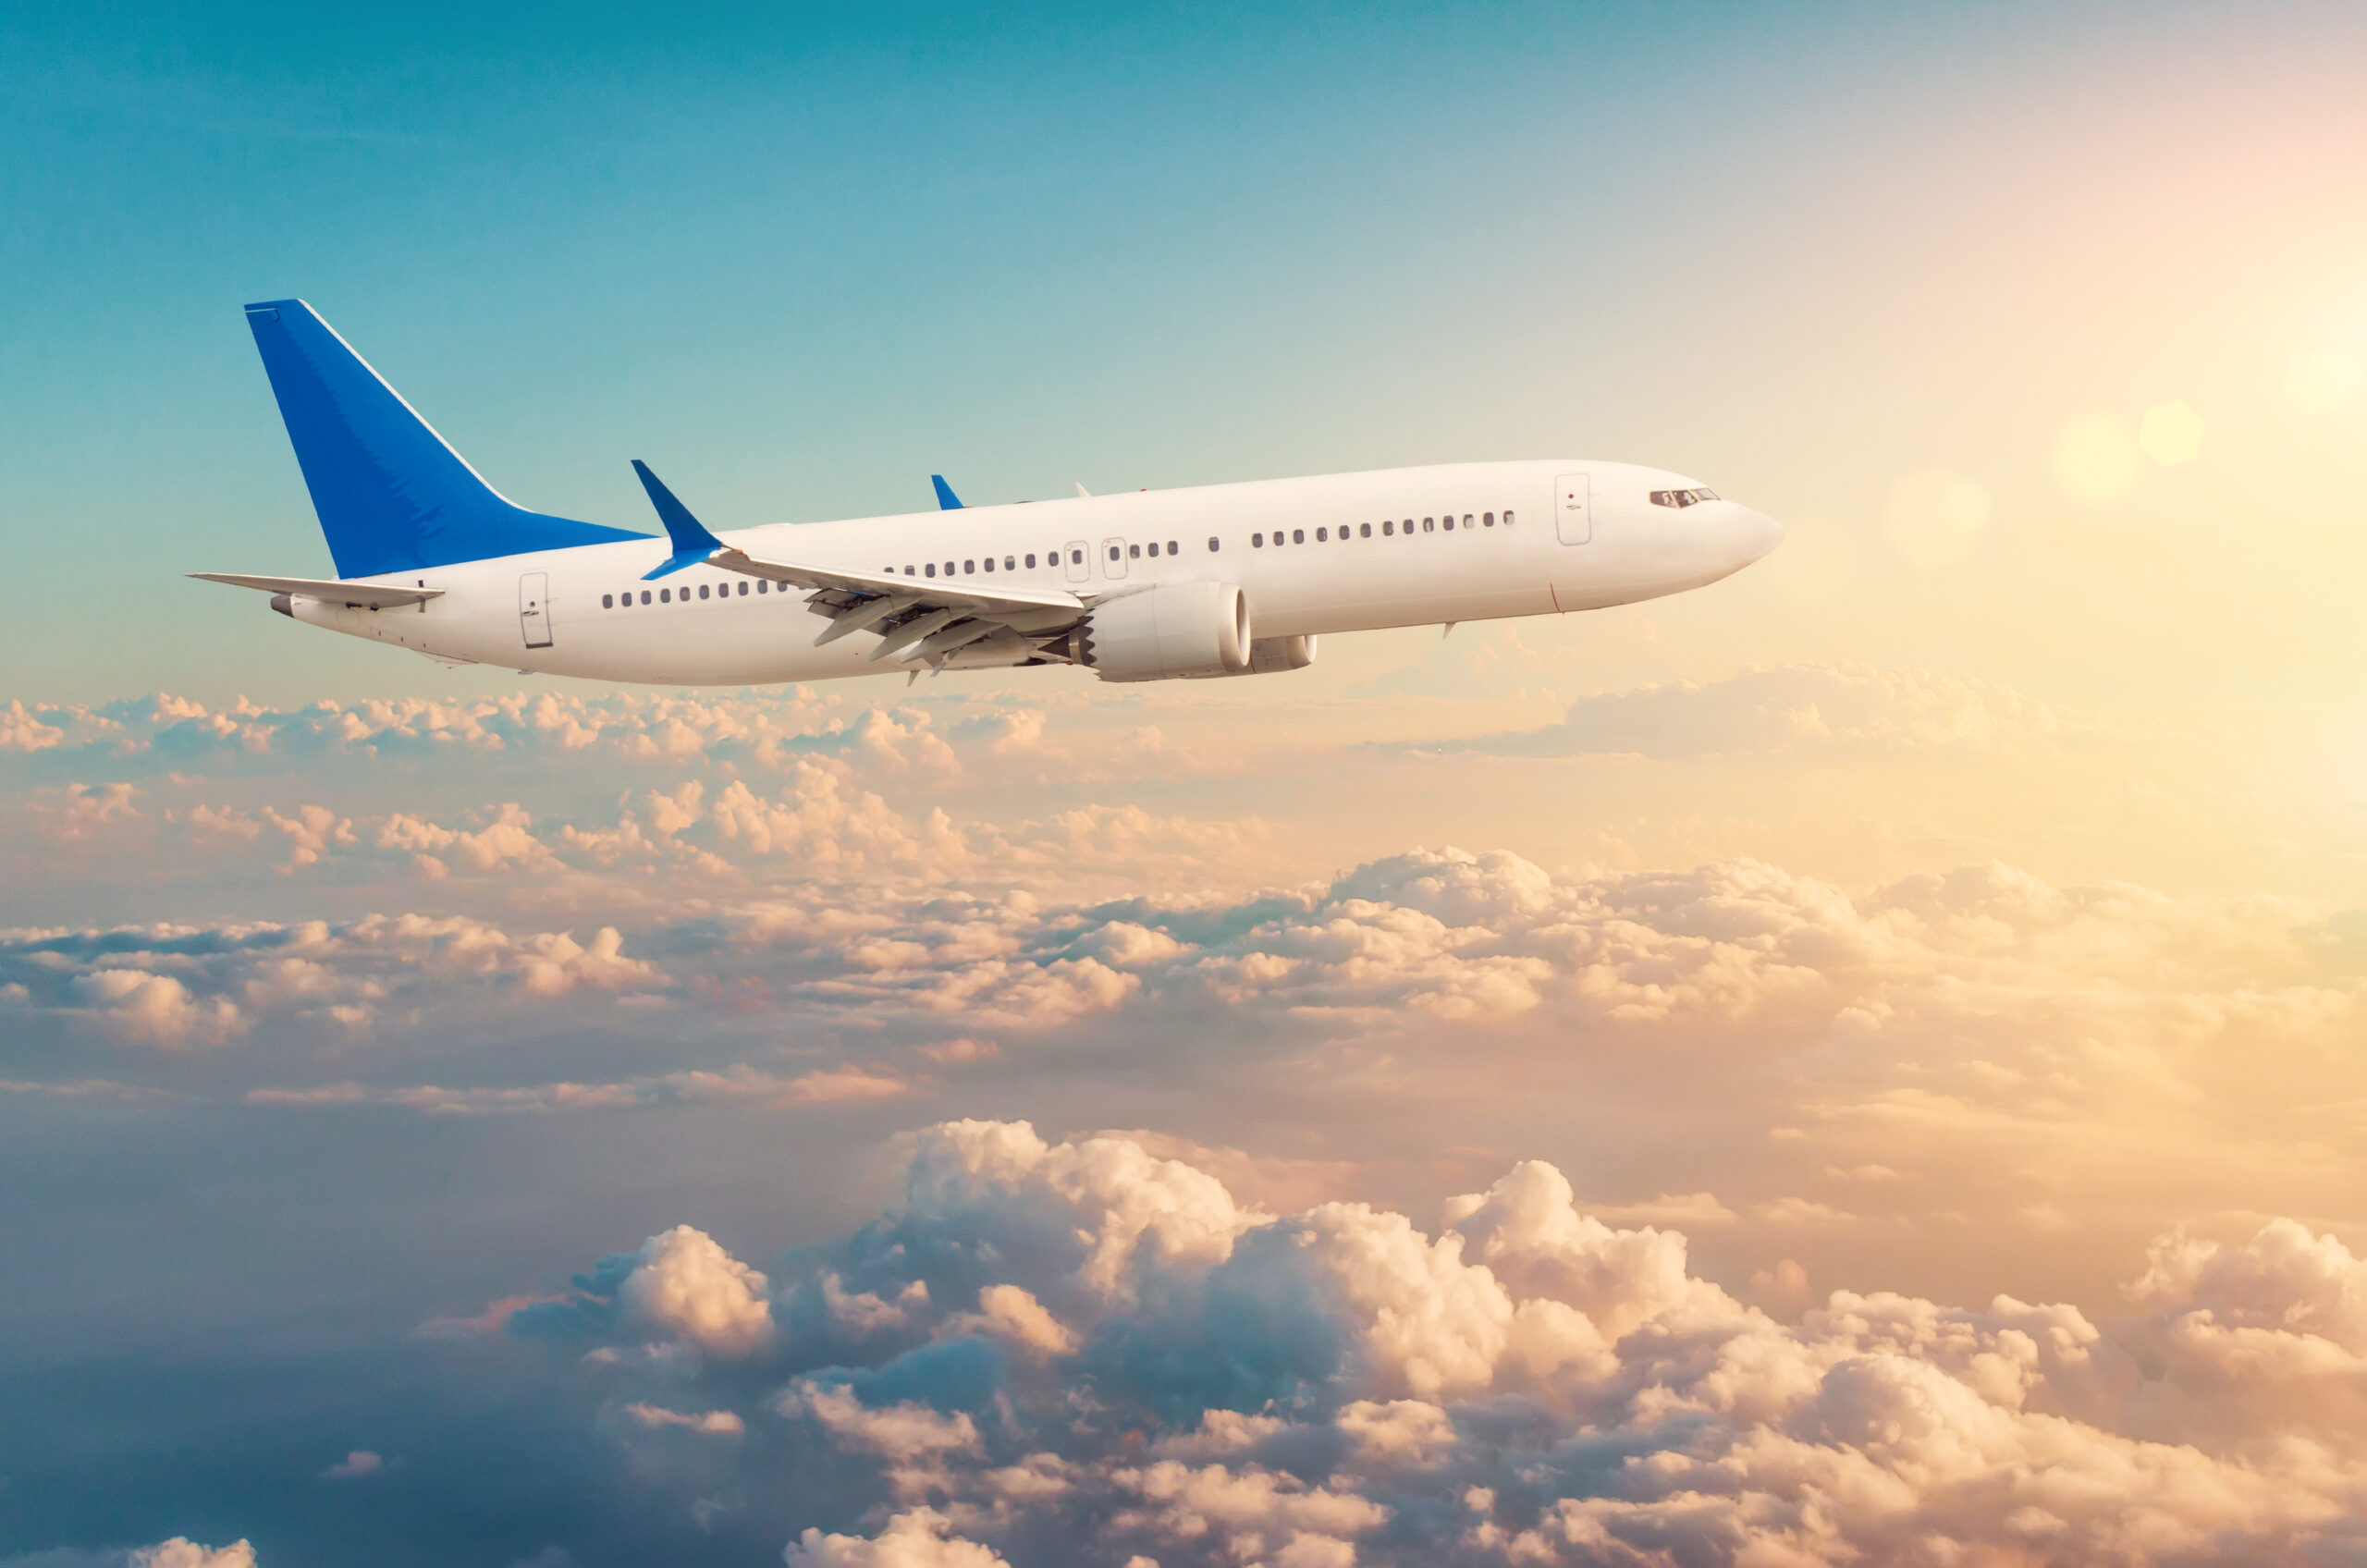

<a id = '0.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Table of Contents</strong></p> 


* [Importing libraries](#2.0)
* [Importing dataset](#4.0)
* [Checking for null values](#3.0)
* [EDA](#1.0)
* [Extract Numerical & Categorical Features?](#5.0)
* [Handling Categorical Data](#6.0)
* [Separate your independent & dependent data](#8.0)
* [Defining function For ML models](#10.0)
    * [Linear Regression Algorithm](#13.0)
    * [Lasso Algorithm](#15.0)
    * [Ridge Algorithm](#16.0)
    * [Decision Tree Algorithm](#11.0)
    * [Random Forest Algorithm](#12.0)




<a id = '2.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing libraries</strong></p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

<a id = '4.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Importing dataset </strong></p>

In [2]:
data = pd.read_excel('Data_Train.xlsx')

<a id = '1.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA) : </strong></p>


<p style = "font-size : 35px; color : #22668D ; font-family : 'Comic Sans MS'; text-align : center; background-color : #8ECDDD; border-radius: 5px 5px;"><strong>head() - shape - info() - describe() - dtypes </strong></p>

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,No info,8345,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

<a id = '3.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Checking for null values</strong></p>

In [7]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
    <h1 style = "font-family : 'Comic Sans MS';" >We can see that Date_of_Journey is a object data type:</h1>
   
* Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
* model will not be able to understand Theses string values,it just understand Time-stamp
    For this we require pandas to_datetime to convert object data type to datetime dtype.

- dt.day method will extract only day of that date
- dt.month method will extract only month of that date
    
</div>


In [10]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
# Defining function to convert ['Date_of_Journey','Dep_Time', 'Arrival_Time'] to datatype
def change_into_datetime(col):
         data[col]=pd.to_datetime(data[col])

In [12]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [13]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
data['Journey_day']=data['Date_of_Journey'].dt.day
data['Journey_month']=data['Date_of_Journey'].dt.month

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.
    
</div>


In [15]:
data.drop('Date_of_Journey', axis=1, inplace=True)

In [16]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-02-20 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-20 05:50:00,2024-02-20 13:15:00,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-02-20 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-20 18:05:00,2024-02-20 23:30:00,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-20 16:50:00,2024-02-20 21:35:00,4h 45m,1 stop,No info,13302,1,3


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Defining functions extract values from [`Dep_Time` , `Arrival_Time`] columns and drop any column
    
</div>


In [17]:
# extract_hour function
def extract_hour(data,col):
    data[col+"_hour"]=data[col].dt.hour
    
# extract__minute function
def extract_min(data,col):
    data[col+"_minute"]=data[col].dt.minute
    
# drop columns function
def drop_column(data,col):
    data.drop(col,axis=1,inplace=True)

In [18]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(data,'Dep_Time')

# Extracting Minutes
extract_min(data,'Dep_Time')

# Now we can drop Dep_Time as it is of no use
drop_column(data,'Dep_Time')

In [19]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-02-20 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2024-02-20 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2024-02-20 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [20]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
extract_hour(data,'Arrival_Time')

# Extracting minutes
extract_min(data,'Arrival_Time')

# Now we can drop Arrival_Time as it is of no use
drop_column(data,'Arrival_Time')

In [21]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Apply pre-processing on duration column,Separate Duration hours and minute from `duration` column
    
</div>


In [22]:
duration=list(data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]       # if duration contains only second, Adds 0 hour

In [23]:
data['Duration']=duration

In [24]:
def hour(x):
    return x.split(' ')[0][0:-1]

In [25]:
def min(x):
    return x.split(' ')[1][0:-1]

In [26]:
data['Duration_hours']=data['Duration'].apply(hour)
data['Duration_mins']=data['Duration'].apply(min)

In [27]:
data.drop('Duration',axis=1,inplace=True)

In [28]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [29]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours         object
Duration_mins          object
dtype: object

In [30]:
data['Duration_hours']=data['Duration_hours'].astype(int)
data['Duration_mins']=data['Duration_mins'].astype(int)

In [31]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_day             int32
Journey_month           int32
Dep_Time_hour           int32
Dep_Time_minute         int32
Arrival_Time_hour       int32
Arrival_Time_minute     int32
Duration_hours          int32
Duration_mins           int32
dtype: object

In [32]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


<a id = '5.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Extract Numerical & Categorical Features</strong></p>   

In [33]:
num_features=[col for col in data.columns if data[col].dtype!='O']
num_features

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [34]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

<a id = '6.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Handling Categorical Data</strong></p>         

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
    <h1 style = "font-family : 'Comic Sans MS';" >We are using 2 main Encoding Techniques to convert Categorical data into some numerical format:</h1>
   
* Nominal data --> data are not in any order --> OneHotEncoder is used in this case
* Ordinal data --> data are in order -->       LabelEncoder is used in this case
    
</div>


In [35]:
categorical=data[cat_features]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Airline vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [238]:
categorical['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

<Axes: xlabel='Airline', ylabel='Price'>

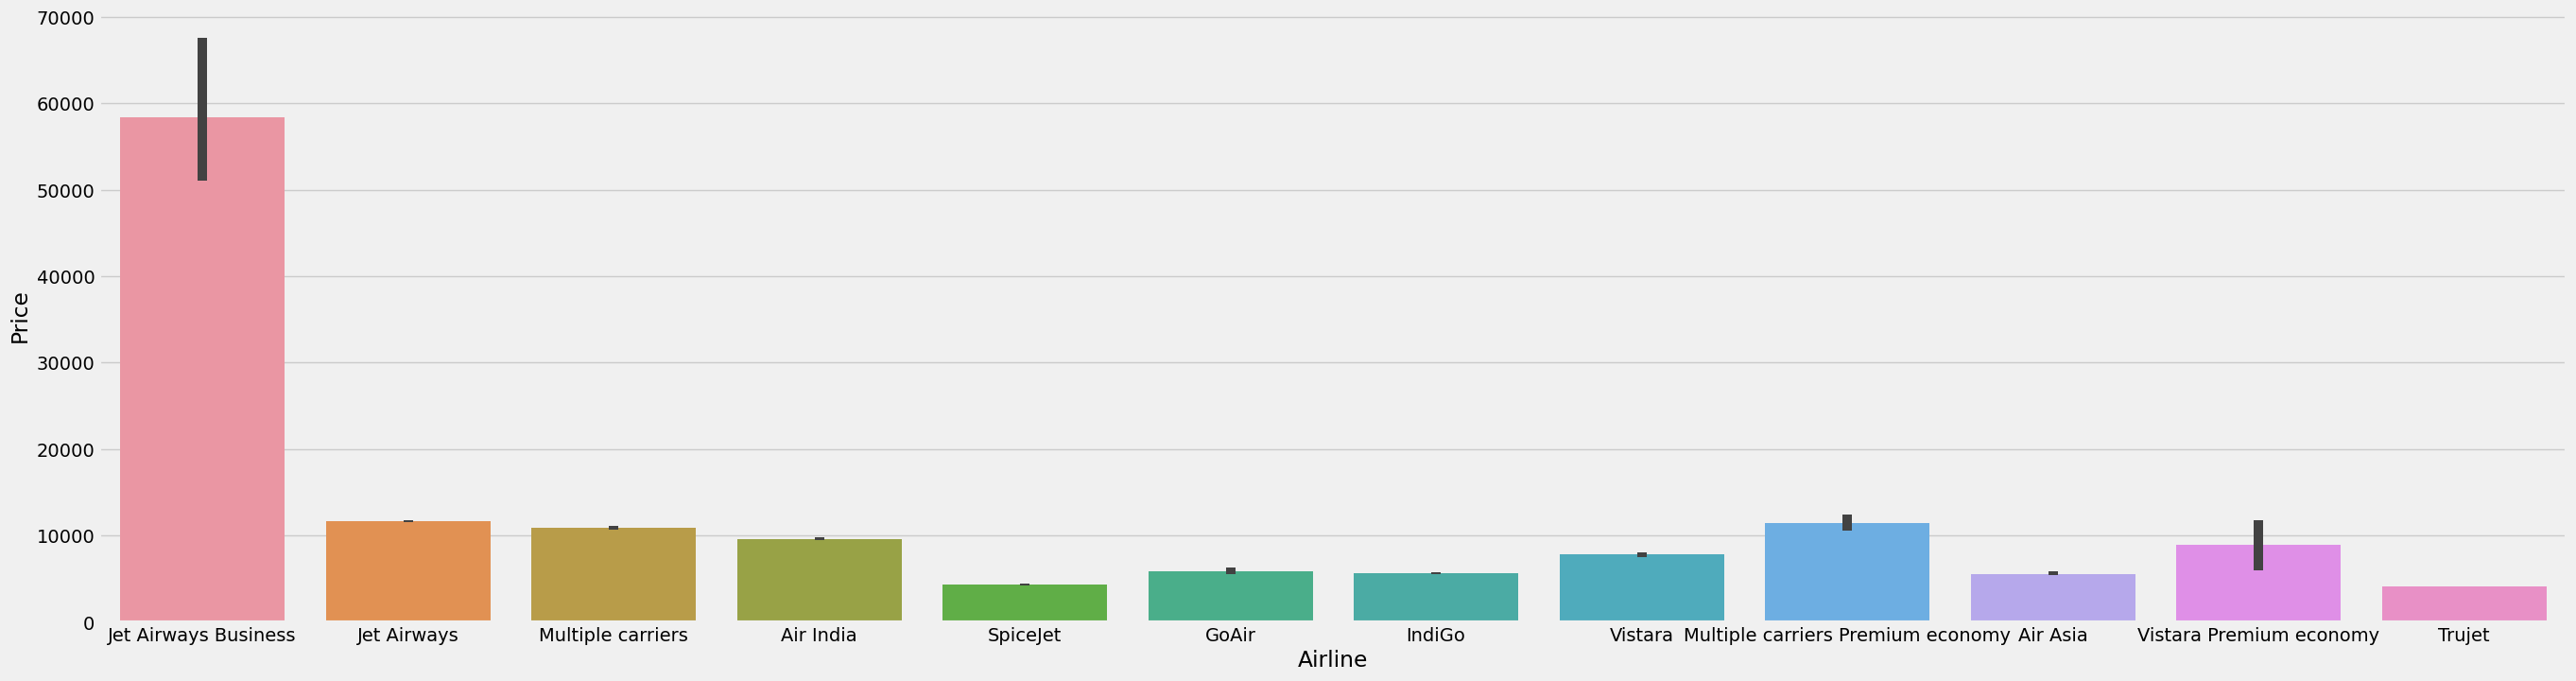

In [36]:
plt.figure(figsize=(30,8))
sns.barplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False))

<Axes: xlabel='Airline', ylabel='Price'>

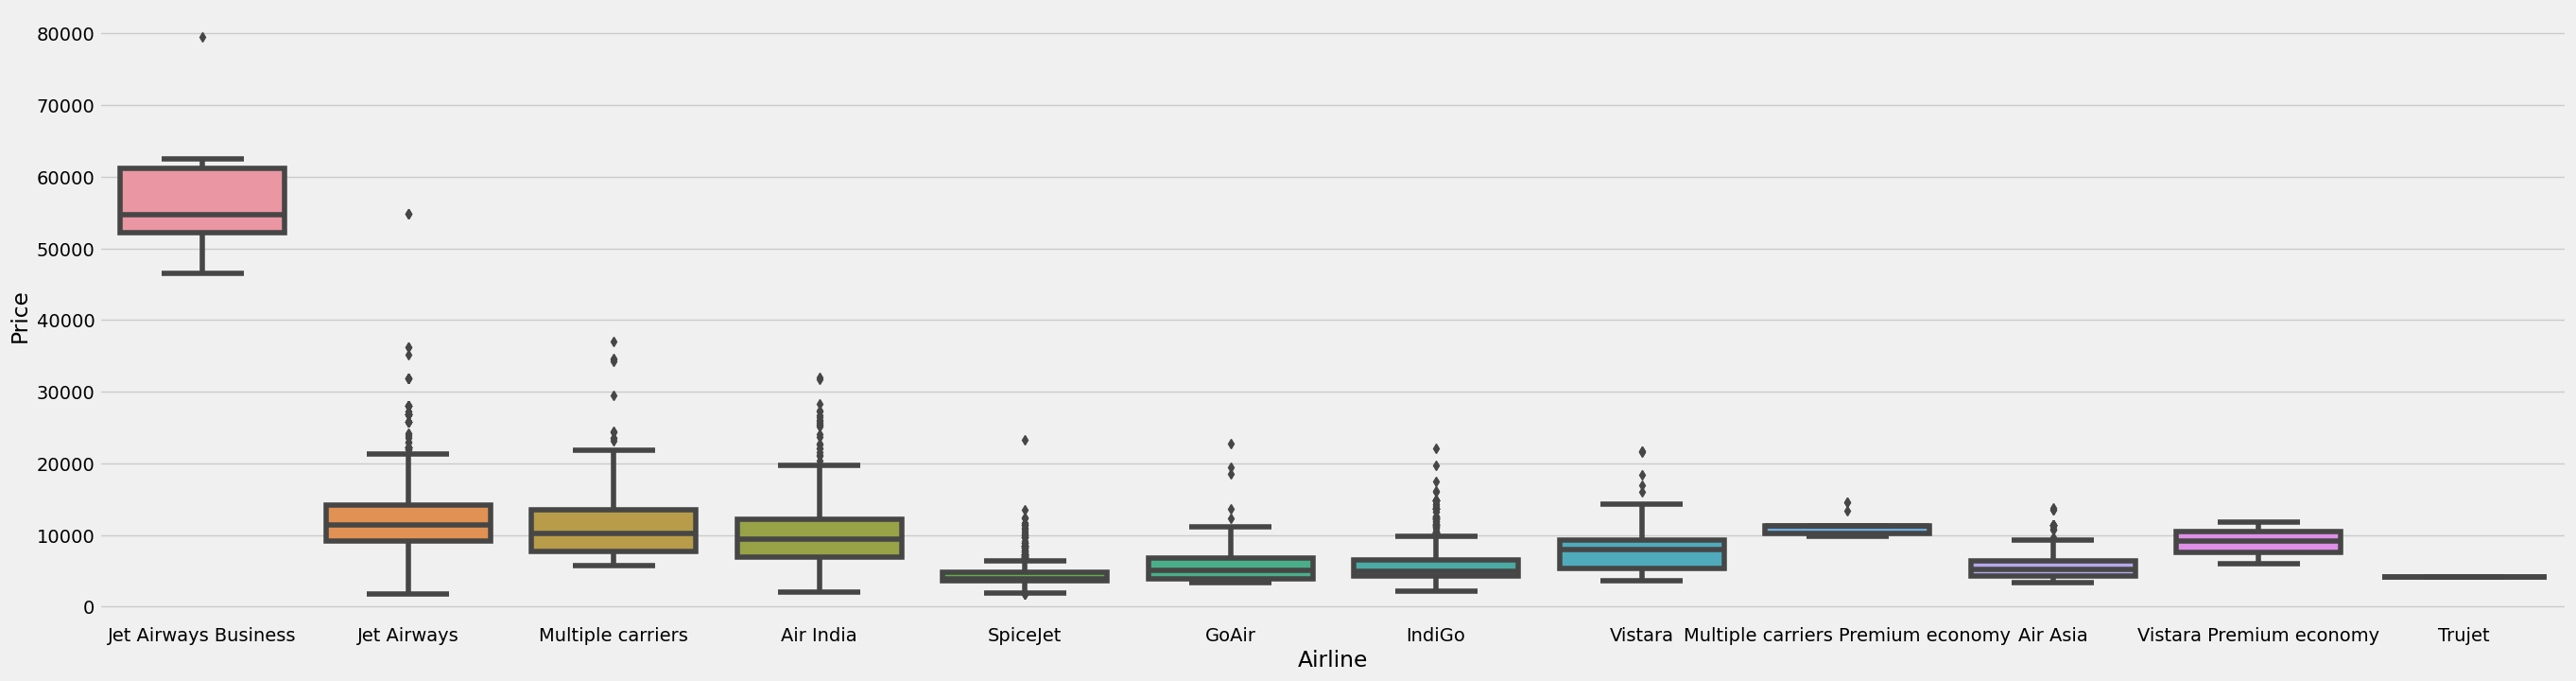

In [37]:
plt.figure(figsize=(30,8))
sns.boxplot(y='Price',x='Airline',data = data.sort_values('Price',ascending=False))

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median    
</div>


In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline=pd.get_dummies(categorical['Airline'], drop_first=True,dtype='int')
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Source vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [39]:
categorical['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

<Axes: xlabel='Source', ylabel='Price'>

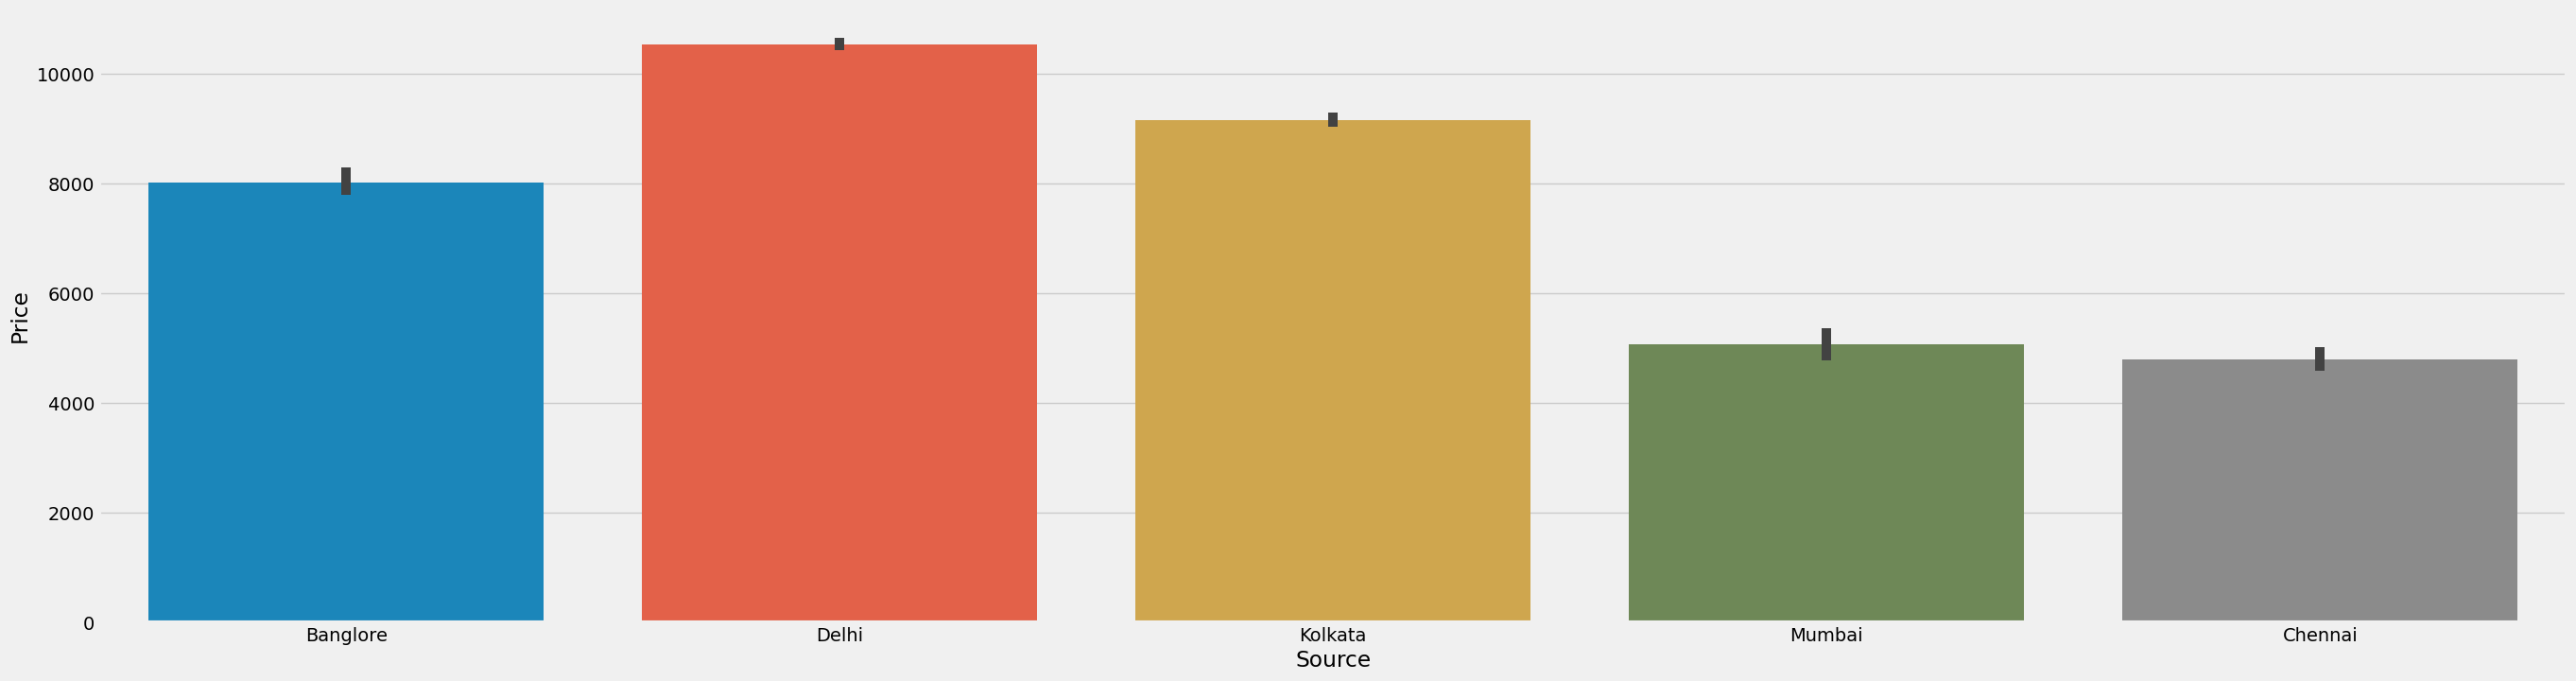

In [40]:
plt.figure(figsize=(30,8))
sns.barplot(y='Price',x='Source',data = data.sort_values('Price',ascending=False))

<Axes: xlabel='Source', ylabel='Price'>

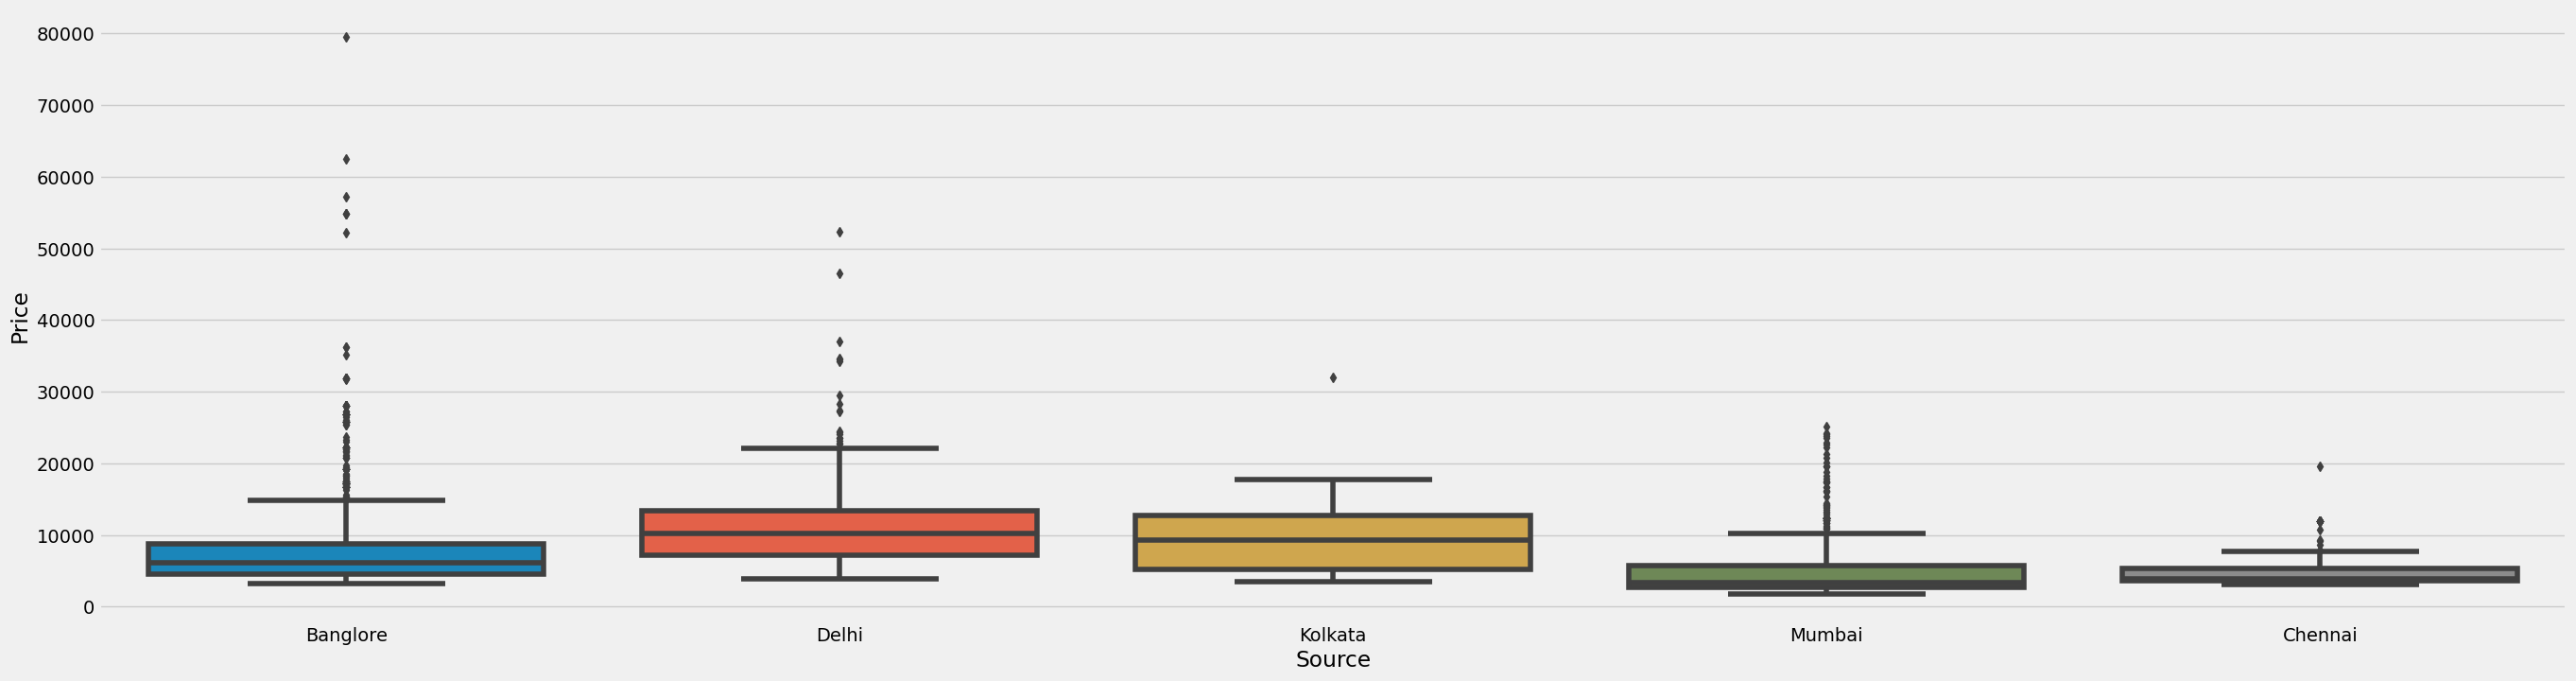

In [41]:
plt.figure(figsize=(30,8))
sns.boxplot(y='Price',x='Source',data = data.sort_values('Price',ascending=False))

In [42]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=pd.get_dummies(categorical['Source'], drop_first=True,dtype='int')
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Destination vs Price Analysis
    - check value_counts()
    - visualize it 
    - Encode the col
    
</div>


In [43]:
categorical['Destination'].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Price'>

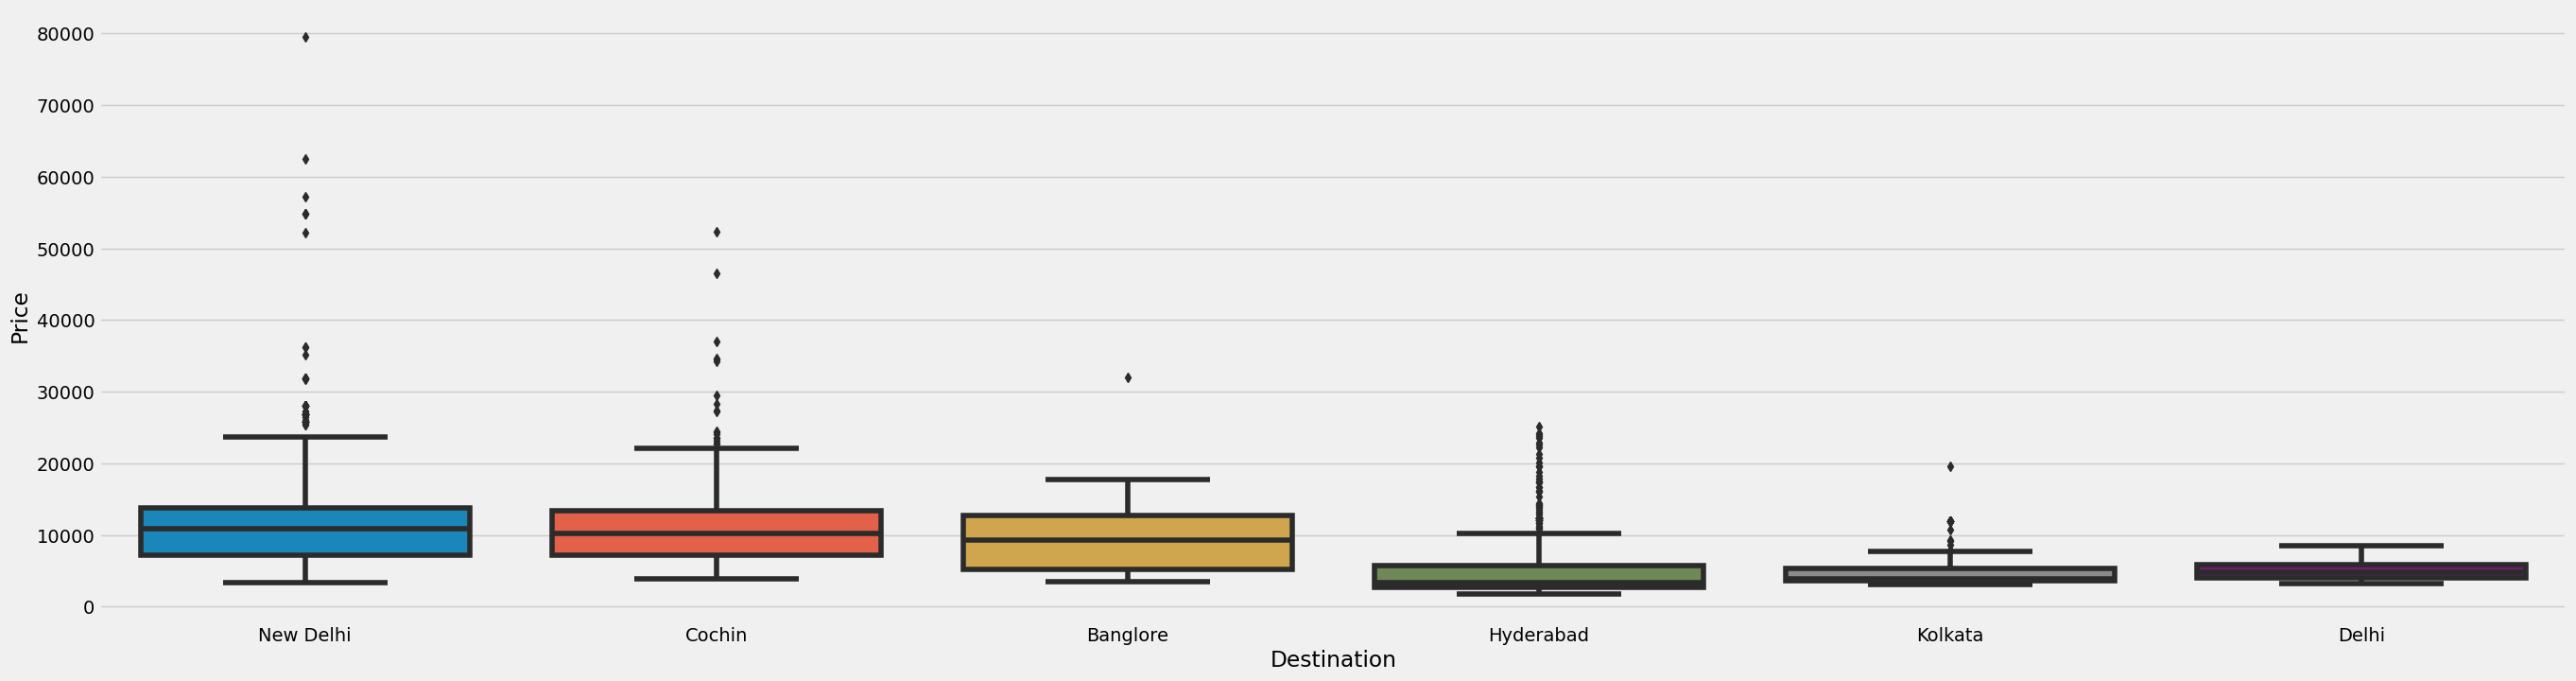

In [44]:
plt.figure(figsize=(30,8))
sns.boxplot(y='Price',x='Destination',data = data.sort_values('Price',ascending=False))

In [45]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination=pd.get_dummies(categorical['Destination'], drop_first=True,dtype='int')
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [46]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Dealing with Route column
    - check value_counts() , unique , nunique , maximum splits
    - creat new columns for each split
    - creat function to print : how many categories in each cat_feature
    
</div>


In [47]:
categorical['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [48]:
categorical['Route'].nunique()

128

In [49]:
rr =categorical['Route'].unique()
print(rr[0].split())
print(rr[0].split('→'))

['BLR', '→', 'DEL']
['BLR ', ' DEL']


In [50]:
len_route =[]
for i in rr :
    len_route.append(len(i.split('→')))

In [51]:
len(len_route)

128

In [52]:
max(len_route)

6

In [53]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]
categorical['Route_6']=categorical['Route'].str.split('→').str[5]

In [54]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN,NaN


In [55]:
categorical['Route_1'].fillna('None',inplace=True)
categorical['Route_2'].fillna('None',inplace=True)
categorical['Route_3'].fillna('None',inplace=True)
categorical['Route_4'].fillna('None',inplace=True)
categorical['Route_5'].fillna('None',inplace=True)
categorical['Route_6'].fillna('None',inplace=True)

In [56]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,None,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,None,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,None,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,None,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,None,None,None


In [57]:
#now extract how many categories in each cat_feature
for feature in categorical.columns:
    print('{} has total {} categories \n'.format(feature,len(categorical[feature].value_counts())))

Airline has total 12 categories 

Source has total 5 categories 

Destination has total 6 categories 

Route has total 128 categories 

Total_Stops has total 5 categories 

Additional_Info has total 10 categories 

Route_1 has total 5 categories 

Route_2 has total 45 categories 

Route_3 has total 30 categories 

Route_4 has total 14 categories 

Route_5 has total 6 categories 

Route_6 has total 2 categories 



<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* As we will see we have lots of features in Route , one hot encoding will not be a better option lets appply Label Encoding   
</div>


In [58]:
encoder=LabelEncoder()

In [59]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5', 'Route_6'],
      dtype='object')

In [60]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4','Route_5','Route_6']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5,1


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Additional_Info contains almost 80% no_info,so we can drop this column
* We can drop Route as well as we have pre-process that column
* Encode Total_Stops colum
  
    
</div>


In [62]:
categorical['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [63]:
drop_column(categorical,'Route')
drop_column(categorical,'Additional_Info')

In [64]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,non-stop,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2 stops,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2 stops,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1 stop,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1 stop,0,34,8,13,5,1


In [65]:
categorical['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* As this is case of Ordinal Categorical type we perform LabelEncoder 
</div>


In [66]:
#  Here Values are assigned with corresponding key 
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [67]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [68]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,1
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,1
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,1
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,1


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-success">
   
* Concatenate dataframes --> categorical + Airline + Source + Destination + data[num_features]
* and Drop columns --> Airline , Source , Destination 
  
    
</div>


In [69]:
data[num_features]

,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,19,55,22,25,2,30
10679,4145,27,4,20,45,23,20,2,35
10680,7229,27,4,8,20,11,20,3,0
10681,12648,1,3,11,30,14,10,2,40


In [70]:
data = pd.concat([categorical,Airline,Source,Destination,data[num_features]],axis=1)
data.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,13,29,13,5,1,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,2,25,1,3,5,1,...,0,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,3,32,4,5,5,1,...,0,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,2,34,3,13,5,1,...,0,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,0,34,8,13,5,1,...,1,13302,1,3,16,50,21,35,4,45


In [71]:
drop_column(data,'Airline')
drop_column(data,'Source')
drop_column(data,'Destination')

In [72]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Air India,GoAir,IndiGo,...,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,1,0,0,1,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,...,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,...,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,...,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,...,1,13302,1,3,16,50,21,35,4,45


In [73]:
pd.set_option('display.max_columns',36)

In [74]:
data.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Route_6,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,13,29,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,25,1,3,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,1,5,5,50,13,15,7,25
2,2,3,32,4,5,5,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,9,6,9,25,4,25,19,0
3,1,2,34,3,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,12,5,18,5,23,30,5,25
4,1,0,34,8,13,5,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,1,3,16,50,21,35,4,45


In [75]:
data.shape

(10682, 36)

In [76]:
data.columns

Index(['Total_Stops', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5',
       'Route_6', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Price',
       'Journey_day', 'Journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

<a id = '8.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Separate your independent (X) & dependent (Y) data</strong></p> 

In [77]:
x=data.drop('Price',axis=1)
y=data['Price']

<a id = '0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong> Split dataset into train & test </strong></p>

In [78]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=44)

In [79]:
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (7156, 35)
X_test shape is  (3526, 35)
y_train shape is  (7156,)
y_test shape is  (3526,)


<a id = '10.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Defining function For ML models</strong></p> 


<div  style = "font-family : 'Comic Sans MS'; border-radius: 10px 10px;" , class="alert alert-block alert-info">
   
* Create function to train our models and print the accuracy ex:  def predict(ml_model)
</div>


In [80]:
def predict(ml_model):          
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Testing score : {}'.format(model.score(X_test,y_test)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

<a id = '13.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Linear Regression Algorithm</strong></p> 


Training score : 0.6252610164995911
Testing score : 0.6463619799107365
predictions are: 
 [ 7673.77021642  9633.840878   12978.52902678 ... 12902.05344936
  7920.53326245 12906.86237279]


r2 score: 0.6463619799107365
MAE: 1960.406625281108
MSE: 7481379.881538634
RMSE: 2735.211121931657


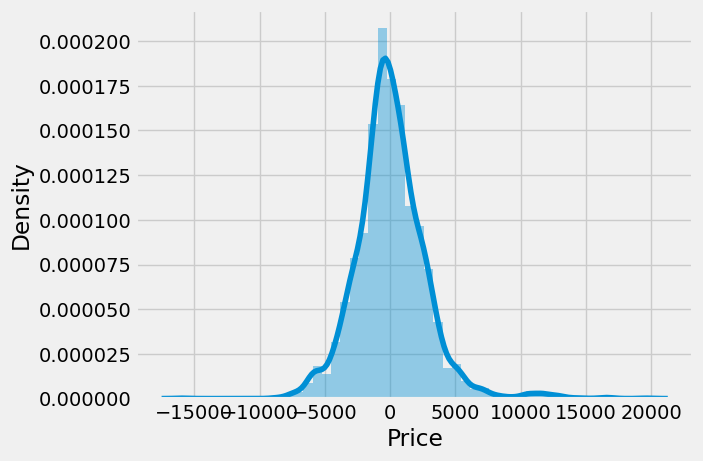

In [81]:
predict(LinearRegression())

<a id = '15.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Lasso Algorithm</strong></p> 

Training score : 0.6251109861588389
Testing score : 0.6466930061079035
predictions are: 
 [ 7680.48177162  9619.66966498 12974.37055801 ... 12894.31097498
  7902.45258555 12942.02400922]


r2 score: 0.6466930061079035
MAE: 1959.9318209154171
MSE: 7474376.865485323
RMSE: 2733.930662157569


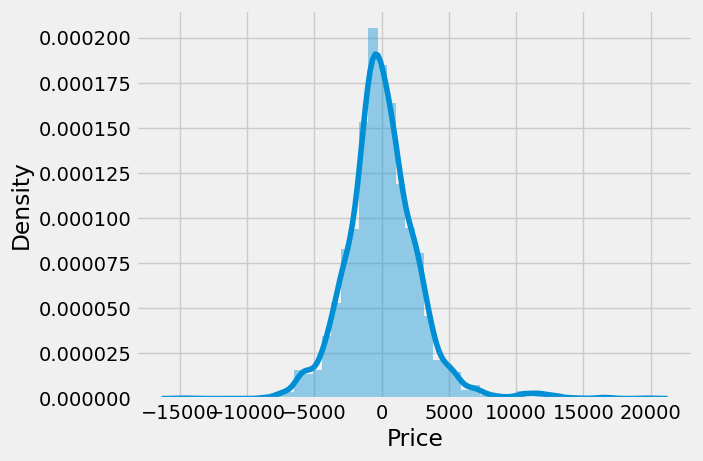

In [82]:
predict(Lasso(max_iter=100000,alpha=.5,selection='random'))

<a id = '16.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Ridge Algorithm</strong></p> 

Training score : 0.6225770369529577
Testing score : 0.6458938355342623
predictions are: 
 [ 7679.25807024  9606.67812664 12963.95892034 ... 12908.31834121
  7876.7155955  12962.50774431]


r2 score: 0.6458938355342623
MAE: 1965.108765113069
MSE: 7491283.697646774
RMSE: 2737.0209530887364


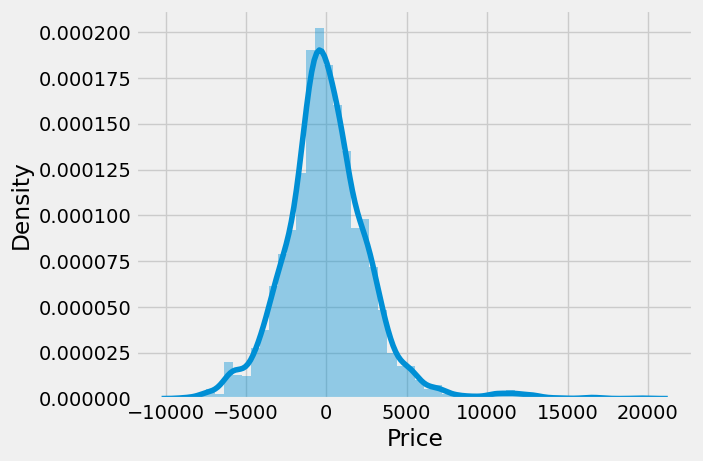

In [83]:
predict(Ridge(alpha=.9 ,  max_iter=10000))

<a id = '11.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Decision Tree Algorithm</strong></p> 


Training score : 0.9077509546419509
Testing score : 0.7907275961145819
predictions are: 
 [ 8318.          6129.66666667  9471.28571429 ... 13282.
  7480.         11077.71428571]


r2 score: 0.7907275961145819
MAE: 1200.377837200299
MSE: 4427256.865068983
RMSE: 2104.1047657065424


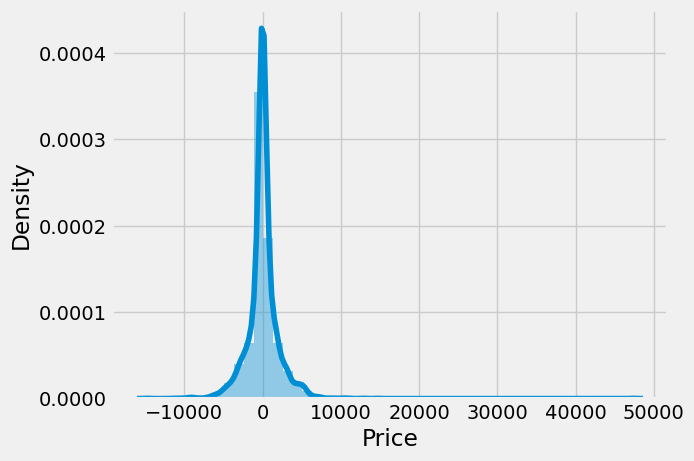

In [84]:
predict(DecisionTreeRegressor(criterion= "squared_error", min_samples_split=10 ,random_state= 5))

<a id = '12.0'></a>
<p style = "font-size : 35px; color : #D2691E ; font-family : 'Comic Sans MS'; text-align : center; background-color : #ffff99; border-radius: 5px 5px;"><strong>Random Forest Algorithm</strong></p> 


Training score : 0.9596661687722844
Testing score : 0.8025280788430506
predictions are: 
 [ 7251.16831429  8086.5052     11291.00343333 ... 13251.37163095
  7495.959      10641.246     ]


r2 score: 0.8025280788430506
MAE: 1185.3821645048351
MSE: 4177612.061450511
RMSE: 2043.9207571357827


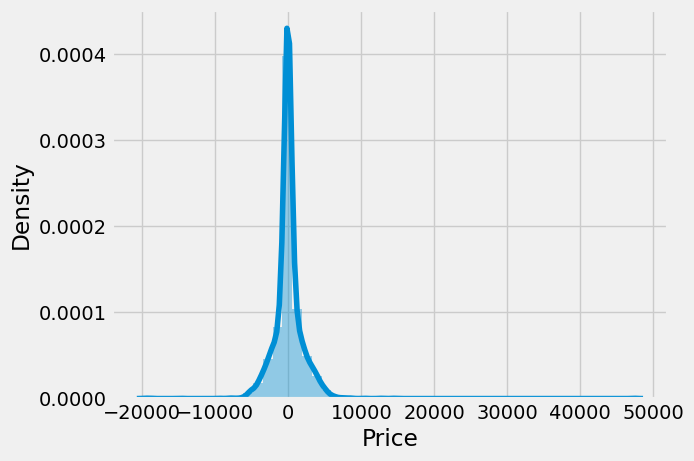

In [85]:
predict(RandomForestRegressor(n_estimators=1000))